# **Setup e carregamento dos dados**

Aqui começamos por importar as bibliotecas necessárias e carregar os dados do ficheiro CSV.


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

from pathlib import Path
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_classif
# from sklearn.preprocessing import StandardScaler

# Configurar o estilo
plt.style.use('default')  # Using default style instead
sns.set_style("whitegrid")  # Set seaborn style
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

DATA_PATH = Path("group_15.csv")
assert DATA_PATH.exists(), f"Ficheiro não encontrado: {DATA_PATH}"

df = pd.read_csv(DATA_PATH)
print("Dimensão:", df.shape)
df.head()


Dimensão: (3000, 49)


,duration_1,duration_2,duration_3,duration_4,duration_5,loudness_level,popularity_level,tempo_class,time_signature,key_mode,...,is_instrumental,is_dance_hit,temp_zscore,resonance_factor,timbre_index,echo_constant,distorted_movement,signal_power,target_class,target_regression
0,0.0,0.0,1.0,0.0,0.0,4.0,3.0,1.0,0.221824,0.767388,...,0.0,0.0,0.755223,1.619076,0.778312,1,0.093345,0.232,class_53,0.930791
1,0.0,0.0,0.0,1.0,0.0,2.0,3.0,1.0,0.221824,0.485996,...,0.0,0.0,0.634436,-1.100584,0.086806,1,0.300788,0.365,class_53,0.751458
2,0.0,0.0,0.0,1.0,0.0,4.0,3.0,1.0,0.221824,0.485996,...,0.0,0.0,0.635036,-1.173949,0.011324,1,0.352649,0.327,class_53,0.213459
3,0.0,0.0,0.0,1.0,0.0,4.0,3.0,2.0,0.221824,-0.076786,...,0.0,0.0,-1.528729,0.669622,0.954538,1,1.447484,0.162,class_53,0.572125
4,0.0,0.0,0.0,1.0,0.0,2.0,3.0,1.0,0.221824,0.485996,...,0.0,0.0,-0.929196,0.863212,0.706977,1,-1.589244,0.295,class_53,0.572125


# **Exploração inicial**
Aqui fazemos algumas conversões de tipos de dados e exploramos o dataset para entender melhor a sua estrutura e conteúdo.

---

Nesta célula abaixo, conseguimos ver os tipos de dados presentes no dataset.

In [ ]:
dtypes = df.dtypes.astype(str).to_frame("dtype")
display(dtypes)

Index(['duration_1', 'duration_2', 'duration_3', 'duration_4', 'duration_5',
       'loudness_level', 'popularity_level', 'tempo_class', 'time_signature',
       'key_mode', 'artist_song_count', 'album_freq', 'movement_index',
       'intensity_level', 'verbal_density', 'purity_score', 'positivity_index',
       'activity_rate', 'loudness_intensity', 'happy_dance',
       'acoustics_instrumental', 'artists_avg_popularity', 'tempo_vs_genre',
       'energy_rank_pct', 'loud_energy_ratio', 'mood_pca', 'mood_cluster',
       'acoustic_valence_mood_cluster', 'explicit', 'signal_strength',
       'mode_indicator', 'focus_factor', 'ambient_level', 'key_sin', 'key_cos',
       'duration_log', 'duration_log_z', 'time_signature_class_boolean',
       'loudness_yeo', 'is_instrumental', 'is_dance_hit', 'temp_zscore',
       'resonance_factor', 'timbre_index', 'echo_constant',
       'distorted_movement', 'signal_power', 'target_class',
       'target_regression'],
      dtype='object')


,dtype
duration_1,float64
duration_2,float64
duration_3,float64
duration_4,float64
duration_5,float64
loudness_level,float64
popularity_level,float64
tempo_class,float64
time_signature,float64
key_mode,float64


Verificamos que existem algumas colunas que são do tipo 'object', vamos verificar se algumas dessas colunas podem ser convertidas para numéricas.

In [47]:
display(df.select_dtypes(include=['object']).head(10))

,signal_strength,focus_factor,signal_power,target_class
0,0.232,0.000548,0.232,class_53
1,0.365,0.0,0.365,class_53
2,0.327,0.0,0.327,class_53
3,0.162,0.0235,0.162,class_53
4,0.295,0.000279,0.295,class_53
5,0.177,9.82e-05,0.177,class_53
6,0.211,1.44e-05,0.211,class_53
7,0.173,0.000111,0.173,class_53
8,0.36,0.0,0.36,class_53
9,0.182,0.00604,0.182,class_53


Como verificamos acima, as colunas 'signal_strength', 'focus_factor' e 'signal_power' são do tipo 'object' mas  podem ser convertidas para numéricas.
Vamos proceder a essas conversões.

In [48]:
df['signal_strength']= pd.to_numeric(df['signal_strength'], errors='coerce')
df['focus_factor']= pd.to_numeric(df['focus_factor'], errors='coerce')
df['signal_power']= pd.to_numeric(df['signal_power'], errors='coerce')

print(df[['signal_strength', 'focus_factor', 'signal_power']])

      signal_strength  focus_factor  signal_power
0               0.232      0.000548         0.232
1               0.365      0.000000         0.365
2               0.327      0.000000         0.327
3               0.162      0.023500         0.162
4               0.295      0.000279         0.295
...               ...           ...           ...
2995            0.993      0.945000         0.993
2996            0.895      0.919000         0.895
2997            0.999      0.988000         0.999
2998            0.998      0.992000         0.998
2999            0.508      0.000000         0.508

[3000 rows x 3 columns]


# **Análise exploratória dos dados**
Aqui fazemos uma análise exploratória dos dados para entender melhor as suas características e identificar possíveis padrões ou anomalias.

---

Definimos as variáveis target de classificação e regressão.

Target de classificação: target_class
Target de regressão: target_regression


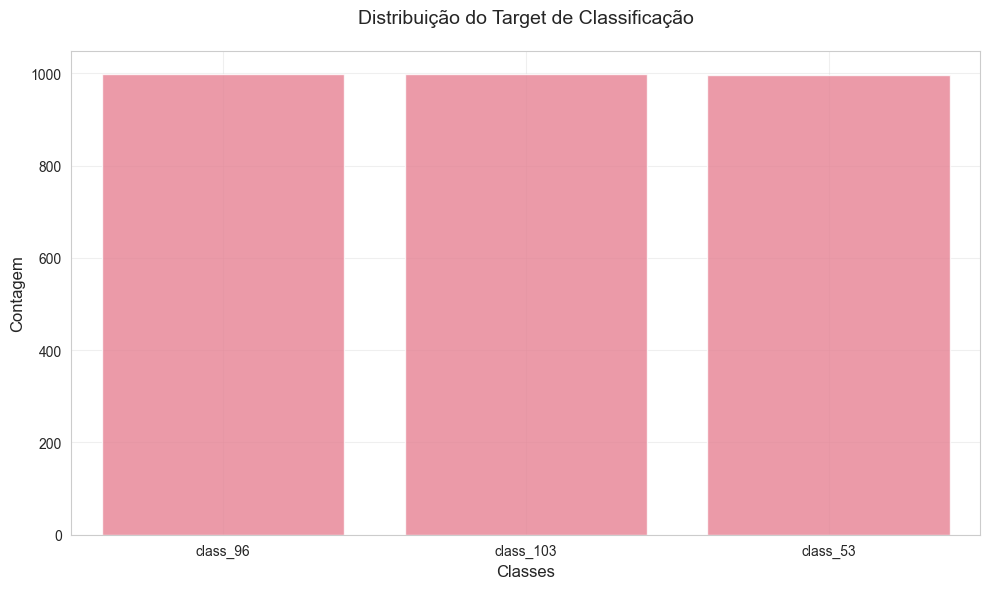


Distribuição detalhada do target_class:
Classe class_96: 999 registos
Classe class_103: 999 registos
Classe class_53: 997 registos


In [ ]:
target_class= 'target_class'
target_regression= 'target_regression'

print("Target de classificação:", target_class)
print("Target de regressão:", target_regression)

## Estatísticas descritivas

Este passo é importante para nos ajudar a entender melhor a distribuição dos dados e identificar possíveis outliers e tendências.

### Descrição das features numéricas
Aqui calculamos algumas estatísticas descritivas para as features numéricas do dataset.

In [70]:
desc_num = df.select_dtypes(include=[np.number]).describe().T
display(desc_num)

,count,mean,std,min,25%,50%,75%,max
duration_1,2995.0,0.005008,0.070604,0.000000,0.000000,0.000000e+00,0.000000,1.000000
duration_2,2995.0,0.039733,0.195364,0.000000,0.000000,0.000000e+00,0.000000,1.000000
duration_3,2995.0,0.141903,0.349009,0.000000,0.000000,0.000000e+00,0.000000,1.000000
duration_4,2995.0,0.802337,0.398303,0.000000,1.000000,1.000000e+00,1.000000,1.000000
duration_5,2995.0,0.011018,0.104406,0.000000,0.000000,0.000000e+00,0.000000,1.000000
loudness_level,2995.0,3.112855,1.271424,0.000000,2.000000,4.000000e+00,4.000000,4.000000
popularity_level,2995.0,1.682137,0.953388,0.000000,1.000000,1.000000e+00,3.000000,4.000000
tempo_class,2995.0,1.154591,0.416519,0.000000,1.000000,1.000000e+00,1.000000,4.000000
time_signature,2995.0,-0.607844,2.315022,-9.024149,0.221824,2.218242e-01,0.221824,2.533318
key_mode,2995.0,-0.045227,1.000332,-1.511882,-0.920961,-7.678645e-02,0.767388,1.611562


### Target Classificação
Aqui calculamos algumas estatísticas descritivas para o target de classificação.


Distribuição do target_class:
 target_class
class_96     999
class_103    999
class_53     997
Name: count, dtype: int64


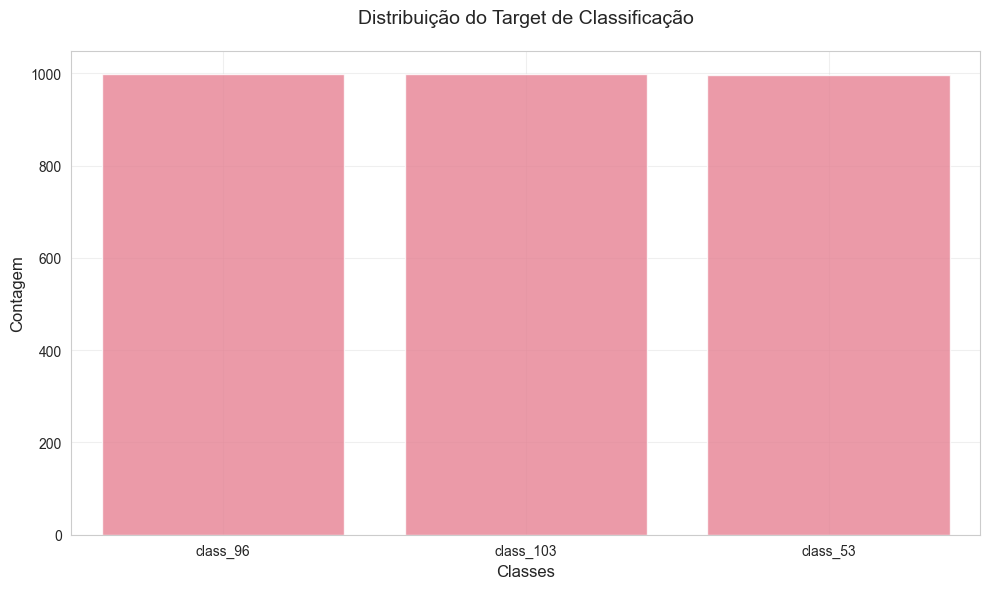

In [71]:
class_dist = df[target_class].value_counts(dropna=False)
print("\nDistribuição do target_class:\n", class_dist)

# Calcular distribuição e percentagens
class_dist = df[target_class].value_counts(dropna=False)
class_pct = df[target_class].value_counts(normalize=True) * 100

fig, ax = plt.subplots(figsize=(10, 6))

bars = sns.barplot(x=class_dist.index, y=class_dist.values, alpha=0.8)

plt.title('Distribuição do Target de Classificação', pad=20, fontsize=14)
plt.xlabel('Classes', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



Podemos concluir que o 'target_class' está perfeitamente equilibrado, onde cada classe tem 1000 registos.

### Target Regressão
Aqui calculamos algumas estatísticas descritivas para o target de regressão.

In [73]:
yreg = df[target_regression]

reg_summary = pd.Series({
    "count": yreg.shape[0],
    "mean": yreg.mean(),
    "std": yreg.std(ddof=1),
    "min": yreg.min(),
    "25%": yreg.quantile(0.25),
    "50%": yreg.median(),
    "75%": yreg.quantile(0.75),
    "max": yreg.max(),
    "skew": yreg.skew(),
    "kurtosis": yreg.kurtosis()
    }, name="target_regression_summary")
display(reg_summary.to_frame())



,target_regression_summary
count,2995.000000
mean,0.060592
std,0.927890
min,-1.490205
25%,-0.907373
50%,0.123792
75%,0.885958
max,2.499956
skew,-0.072638
kurtosis,-1.284175


## Análise Univariada
Esta análise foca-se em examinar cada variável individualmente para entender a sua distribuição e características.

### Distribuição do target de regressão

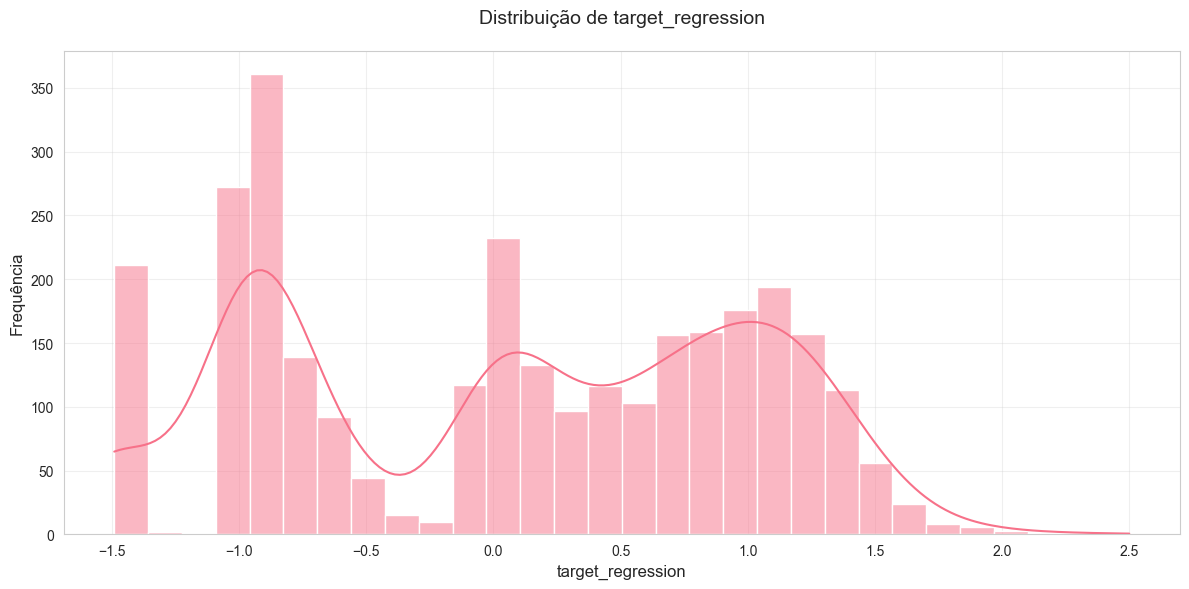

In [53]:
fig = plt.figure(figsize=(12, 6))
sns.histplot(data=df, x=target_regression, bins=30, kde=True)
plt.title(f"Distribuição de {target_regression}", pad=20)
plt.xlabel(target_regression)
plt.ylabel("Frequência")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

###  Distribuição de todas as features 
Aqui analisamos as distribuições de todas as features do dataset pois estas features podem mostrar caracteristicas que nos ajudem no pré-processamento dos dados.

Features: 45


C:\Users\DavidMendonça\AppData\Local\Temp\ipykernel_10956\662335238.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


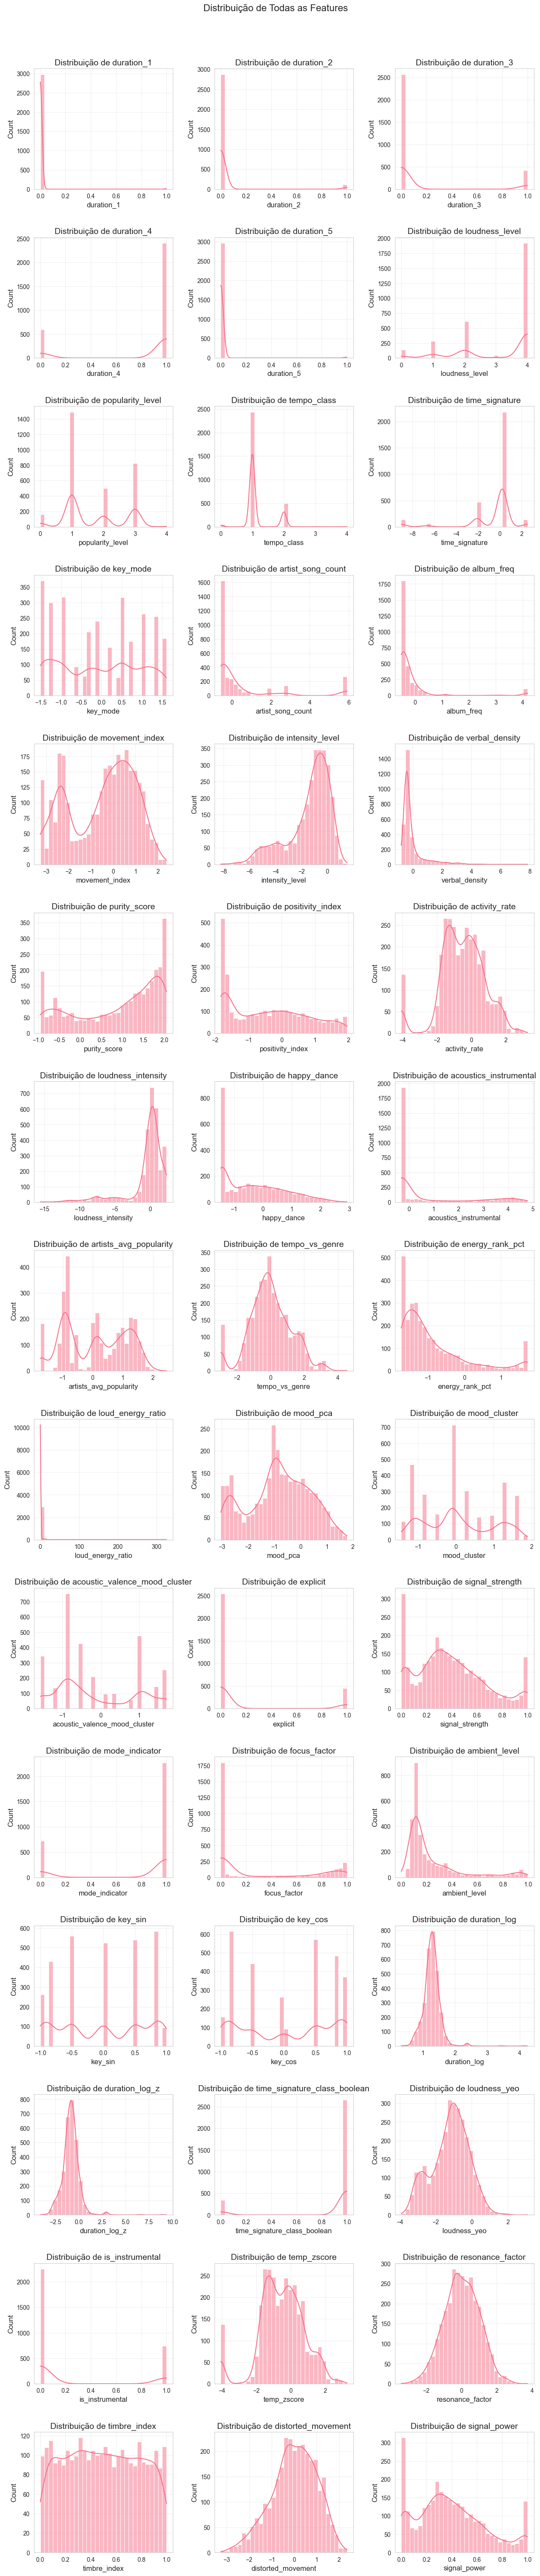

Número total de variáveis: 45


In [65]:
n_cols = 3  
features = [c for c in df.columns if c not in [target_class, target_regression]]
print(f"Features: {len(features)}")
n_rows = (len(features) + n_cols - 1) // n_cols
fig = plt.figure(figsize=(15, 5*n_rows))
gs = gridspec.GridSpec(n_rows, n_cols)
gs.update(wspace=0.3, hspace=0.4)

for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.histplot(data=df, x=feat, bins=30, kde=True)
    plt.title(f"Distribuição de {feat}")
    plt.grid(True, alpha=0.3)
    
plt.suptitle("Distribuição de Todas as Features", y=0.90, fontsize=16)  
plt.tight_layout()
plt.show()

print(f"Número total de variáveis: {len(features)}")

### Remoção de linhas duplicadas
Aqui removemos as linhas duplicadas do dataset para garantir que cada registo é único.

In [56]:
n_duplicates = df.duplicated().sum()
print(f"Número de linhas duplicadas: {n_duplicates}")
print(f"Dimensão original do DataFrame: {df.shape}")

# Remover linhas duplicadas
df = df.drop_duplicates()

# Verificar nova dimensão do DataFrame
print(f"Nova dimensão do DataFrame: {df.shape}")
print(f"Número de linhas removidas: {n_duplicates}")

Número de linhas duplicadas: 0
Dimensão original do DataFrame: (3000, 49)
Nova dimensão do DataFrame: (3000, 49)
Número de linhas removidas: 0


### Análise de valores nulos e valores únicos
Com esta análise conseguimos identificar colunas com valores nulos e através dos valores únicos conseguimos identificar se as colunas númericas estão em escalas diferentes.

In [57]:

info_df = pd.DataFrame({
    'Missing Values': df.isnull().sum(),
    'Missing (%)': (df.isnull().sum() / len(df)) * 100,
    'Unique Values': df.nunique(),
})

info_df = info_df.sort_values('Missing Values', ascending=True)

info_df['Missing (%)'] = info_df['Missing (%)'].round(2)

display(info_df)

total_null_rows = df.isnull().any(axis=1).sum()
print(f"\nTotal de linhas com valores nulos: {total_null_rows}")
print(f"Percentagem de linhas com valores nulos: {(total_null_rows/len(df)*100):.2f}%")

,Missing Values,Missing (%),Unique Values
duration_1,0,0.00,2
duration_2,0,0.00,2
duration_3,0,0.00,2
duration_4,0,0.00,2
duration_5,0,0.00,2
loudness_level,0,0.00,5
popularity_level,0,0.00,5
tempo_class,0,0.00,5
time_signature,0,0.00,5
key_mode,0,0.00,24



Total de linhas com valores nulos: 5
Percentagem de linhas com valores nulos: 0.17%


Como temos uma percentagem baixa de linhas com valores nulos (0.17%), optamos por remover as linhas com valores nulos.

In [58]:
df = df.dropna(how='any', axis=0)

null_count = df.isnull().any(axis=1).sum()
print(f"  - Linhas com valores nulos: {null_count}")

  - Linhas com valores nulos: 0


## Conclusões da Análise Univariada
Aqui apresentamos as principais conclusões obtidas a partir da análise univariada dos dados.

### Colunas constantes
Como podemos verificar nos histogramas acima, as colunas 'is_dance_hit' e 'echo_constant' são constantes, ou seja, apresentam o mesmo valor para todos os registos. 

Estas colunas não fornecem informação útil para a modelagem e podem ser removidas do dataset.

In [59]:
const_cols = df.columns[df.nunique() <= 1].tolist()

if const_cols:
    print(f" Colunas constantes: {const_cols}")
    
df = df.drop(columns=const_cols)

 Colunas constantes: ['is_dance_hit', 'echo_constant']


### Diferença de escalas nos dados
Através da análise dos valores únicos e dos histogramas conseguimos identificar que algumas colunas numéricas estão em escalas diferentes. 

É importante agrupar as features pelos tipos semânticos e não apenas pelo 'dtype'.

Verificamos a existência de **variáveis do tipo binárias** no formato de **one-hot encoding**, que são do tipo numérico mas representam categorias, **variáveis categóricas discretas**, que são do tipo numérico mas representam categorias com uma ordem, **variáveis contínuas já normalizadas (z-score)** 

## Análise Bivariada
Esta análise foca-se em examinar a relação entre as features e as variáveis target para entender o impacto de cada feature nos targets.

### Análise bivariada com o target de regressão
Aqui analisamos a relação entre as features e o target de regressão.

Top 10 |correlações| com target_regression:


,abs_corr,corr
artists_avg_popularity,0.940299,0.940299
popularity_level,0.466426,0.466426
artist_song_count,0.409517,-0.409517
explicit,0.370942,0.370942
album_freq,0.331766,-0.331766
verbal_density,0.331364,0.331364
mode_indicator,0.242538,-0.242538
positivity_index,0.239019,-0.239019
purity_score,0.187523,-0.187523
acoustics_instrumental,0.155630,0.155630


C:\Users\DavidMendonça\AppData\Local\Temp\ipykernel_10956\1906712891.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


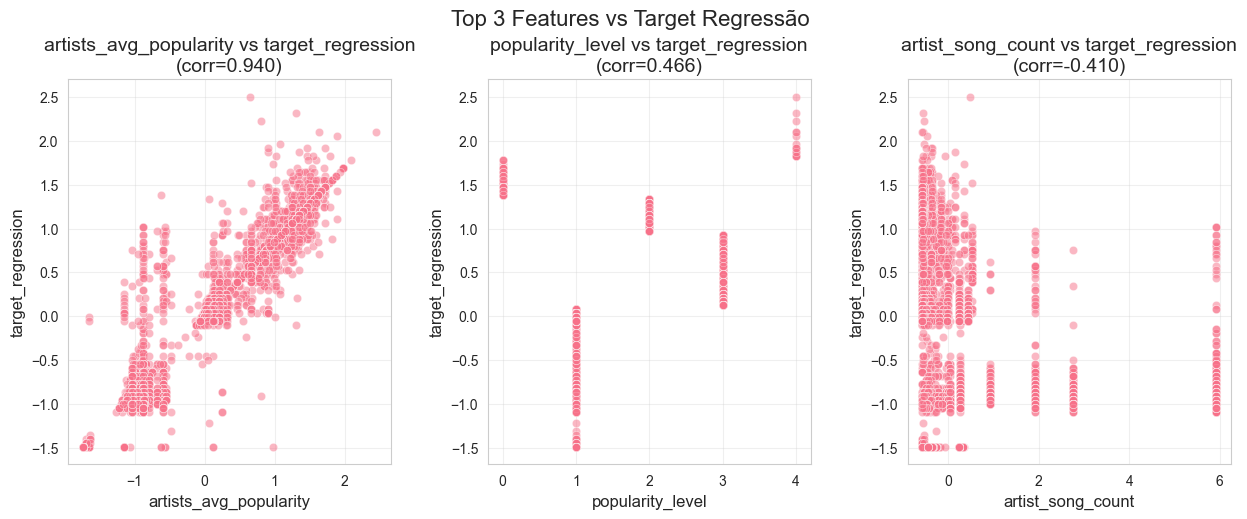

In [61]:
top10_corr_reg = None
if target_regression is not None:
    num_df = df.select_dtypes(include=[np.number])
    feats_num = num_df.drop(columns=[target_regression], errors='ignore')
    corr_series = feats_num.corrwith(df[target_regression]).dropna()
    corr_df = corr_series.abs().sort_values(ascending=False).to_frame("abs_corr")
    corr_df["corr"] = corr_series.loc[corr_df.index]
    top10_corr_reg = corr_df.head(10)
    print("Top 10 |correlações| com target_regression:")
    display(top10_corr_reg)

    fig = plt.figure(figsize=(15, 5))
    gs = gridspec.GridSpec(1, 3)
    gs.update(wspace=0.3)

    for i, feat in enumerate(top10_corr_reg.index[:3]):
        ax = plt.subplot(gs[i])
        sns.scatterplot(data=df, x=feat, y=target_regression, alpha=0.5)
        plt.title(f"{feat} vs {target_regression}\n(corr={corr_series[feat]:.3f})")
        plt.grid(True, alpha=0.3)

    plt.suptitle("Top 3 Features vs Target Regressão", y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()

### Análise bivariada com o target de classificação
Aqui analisamos a relação entre as features e o target de classificação.

Aqui usamos o classificador f_classif para selecionar as melhores features e utilizamos boxplots para visualizar a distribuição das features em relação às classes do target de classificação.

Primeiro, selecionamos as features numéricas e removemos a coluna do target de regressão porque não é relevante para esta análise.

Nums

Top 10 F-score (classificação):


,feature,F_score,p_value
0,movement_index,5302.478902,0.0
1,positivity_index,2496.449463,0.0
2,artists_avg_popularity,1965.653470,0.0
3,focus_factor,1882.780812,0.0
4,mood_pca,1843.731518,0.0
5,intensity_level,1825.088516,0.0
6,happy_dance,1781.270673,0.0
7,loudness_yeo,1660.211361,0.0
8,is_instrumental,1089.234841,0.0
9,artist_song_count,974.706533,0.0


C:\Users\DavidMendonça\AppData\Local\Temp\ipykernel_10956\1469616412.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


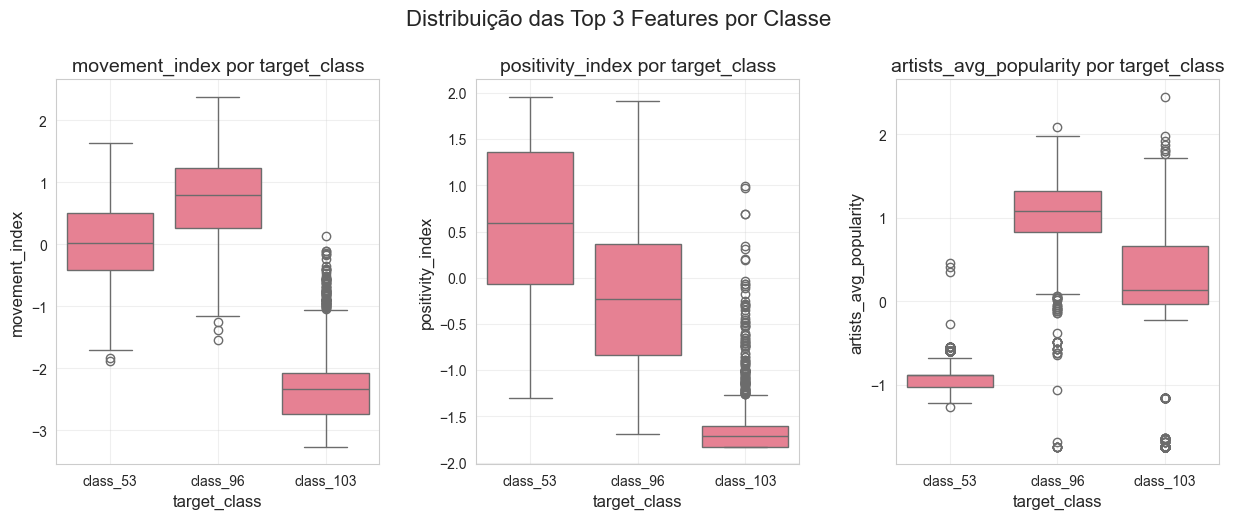

In [62]:
top10_f = None

X = df.select_dtypes(include=[np.number]).copy()
X = X.drop(columns=[target_regression])
y = df[target_class].astype(str)

le = LabelEncoder()
y_enc = le.fit_transform(y) # transformar labels em inteiros

# remover colunas com NaN e constantes

X = X.loc[:, X.nunique() > 1]

f_vals, p_vals = f_classif(X, y_enc)
fdf = pd.DataFrame({"feature": X.columns, "F_score": f_vals, "p_value": p_vals})
fdf = fdf.replace([np.inf, -np.inf], np.nan).dropna(subset=["F_score"])
top10_f = fdf.sort_values("F_score", ascending=False).head(10).reset_index(drop=True)

print("Top 10 F-score (classificação):")
display(top10_f)

# boxplots para as 3 melhores
top3 = top10_f["feature"].head(3).tolist()
classes_sorted = sorted(df[target_class].astype(str).unique())
fig = plt.figure(figsize=(15, 5))
gs = gridspec.GridSpec(1, 3)
gs.update(wspace=0.3)

for i, feat in enumerate(top3):
    ax = plt.subplot(gs[i])
    sns.boxplot(data=df, x=target_class, y=feat)
    plt.title(f"{feat} por {target_class}")
    plt.grid(True, alpha=0.3)

plt.suptitle("Distribuição das Top 3 Features por Classe", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()